In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
produccion = pd.read_csv('drive/MyDrive/Ficheros/20190321_Produccion_Fotovoltaicas.csv')

instalacion = pd.read_csv('drive/MyDrive/Ficheros/20190321_Instalaciones_Fotovoltaicas.csv')

In [3]:
dataframe = produccion.merge(instalacion, on='cil')

dataframe.produccion_kWh = dataframe['produccion_kWh']/dataframe['potenciaPicoKw']

dataframe.drop(columns=['instalacion_fk', 'consumo_kWh', 'numSerie', 'modelo', 'marca', 'lat',	'lng',	'potenciaNominalKw',	'potenciaPicoKw'],inplace=True )

dataframe.index = pd.to_datetime(dataframe.fecha)

In [4]:
dataframe = dataframe.groupby(by='cil').resample('1M').sum()

In [5]:
dataframe.reset_index(inplace=True)

dataframe.head(12)

,cil,fecha,produccion_kWh
0,ES0264121303864001FV1F001,2011-01-31,0.000000
1,ES0264121303864001FV1F001,2011-02-28,0.000000
2,ES0264121303864001FV1F001,2011-03-31,0.000000
3,ES0264121303864001FV1F001,2011-04-30,0.000000
4,ES0264121303864001FV1F001,2011-05-31,3.738710
5,ES0264121303864001FV1F001,2011-06-30,86.515438
6,ES0264121303864001FV1F001,2011-07-31,87.954211
7,ES0264121303864001FV1F001,2011-08-31,76.275992
8,ES0264121303864001FV1F001,2011-09-30,67.076244
9,ES0264121303864001FV1F001,2011-10-31,59.840370


In [6]:
dataframe.index = dataframe.fecha
dataframe['mes'] = dataframe.fecha.dt.month
dataframe['año'] = dataframe.fecha.dt.year

In [10]:
for nombre, instalacion in dataframe.groupby(by='cil'):
  for mes, df in instalacion.groupby(by='mes'):
    media = df.produccion_kWh.mean()
    desviacion = df.produccion_kWh.std()
    for produccion in df.itertuples():
      if produccion[3] < (media-desviacion*1.5):
        print(f"Hay una anomalía en la instalacion {nombre} en el mes {mes} del año {produccion[5]}")


Hay una anomalía en la instalacion ES0264121303864001FV1F001 en el mes 1 del año 2011
Hay una anomalía en la instalacion ES0264121303864001FV1F001 en el mes 1 del año 2019
Hay una anomalía en la instalacion ES0264121303864001FV1F001 en el mes 2 del año 2011
Hay una anomalía en la instalacion ES0264121303864001FV1F001 en el mes 2 del año 2019
Hay una anomalía en la instalacion ES0264121303864001FV1F001 en el mes 3 del año 2011
Hay una anomalía en la instalacion ES0264121303864001FV1F001 en el mes 4 del año 2011
Hay una anomalía en la instalacion ES0264121303864001FV1F001 en el mes 5 del año 2011
Hay una anomalía en la instalacion ES0264121303864001FV1F001 en el mes 6 del año 2018
Hay una anomalía en la instalacion ES0264121303864001FV1F001 en el mes 7 del año 2018
Hay una anomalía en la instalacion ES0264121303864001FV1F001 en el mes 8 del año 2016
Hay una anomalía en la instalacion ES0264121303864001FV1F001 en el mes 9 del año 2016
Hay una anomalía en la instalacion ES0264121303864001F

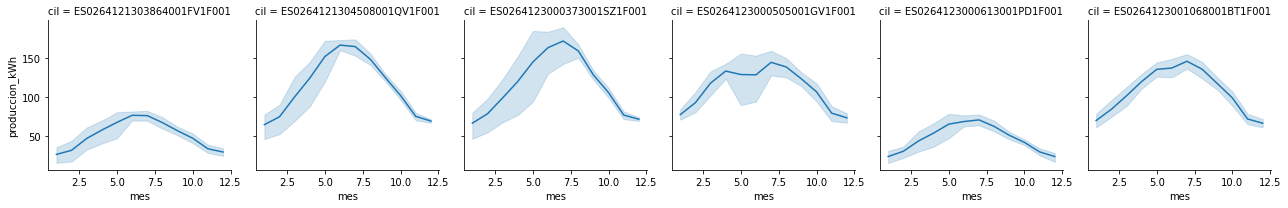

In [17]:
g = sns.FacetGrid(dataframe, col='cil')
g.map(sns.lineplot,'mes','produccion_kWh')